In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [3]:
shuffle = False
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/content/drive/MyDrive/datasets/movie.csv', sep=",")
X = dataset["text"]
y = dataset["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=shuffle)

X_train, y_train

(0       I grew up (b. 1965) watching and loving the Th...
 1       When I put this movie in my DVD player, and sa...
 2       Why do people who do not know what a particula...
 3       Even though I have great interest in Biblical ...
 4       Im a die hard Dads Army fan and nothing will e...
                               ...                        
 7995    *May contain spoilers*<br /><br />I bent over ...
 7996    Be very afraid of anyone who likes this film. ...
 7997    Can they possibly get any worse than this? Pro...
 7998    I give it a 2, because of the beautiful Medite...
 7999    I'm not a fan of Adam Sandler. In fact, I don'...
 Name: text, Length: 8000, dtype: object, 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7995    0
 7996    0
 7997    0
 7998    0
 7999    1
 Name: label, Length: 8000, dtype: int64)

## GRU

In [6]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input, Bidirectional

vectorize_layer = TextVectorization(max_tokens=50000)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64))


model.add(Bidirectional(tf.keras.layers.GRU(32)))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          3200000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               18816     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 3,220,401
Trainable params: 3,220,401
No

In [7]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, callbacks=[history_Adam, early_stopping])

Epoch 1/20
80/80 [==============================] - 29s 299ms/step - loss: 0.6912 - accuracy: 0.5309 - val_loss: 0.6778 - val_accuracy: 0.6102
Epoch 2/20
80/80 [==============================] - 15s 185ms/step - loss: 0.5134 - accuracy: 0.7517 - val_loss: 0.4506 - val_accuracy: 0.8023
Epoch 3/20
80/80 [==============================] - 19s 239ms/step - loss: 0.2057 - accuracy: 0.9220 - val_loss: 0.4515 - val_accuracy: 0.8148
Epoch 4/20
80/80 [==============================] - 22s 278ms/step - loss: 0.0644 - accuracy: 0.9809 - val_loss: 0.5781 - val_accuracy: 0.8108
Epoch 5/20
80/80 [==============================] - 16s 198ms/step - loss: 0.0252 - accuracy: 0.9930 - val_loss: 0.7510 - val_accuracy: 0.8217
Epoch 5: early stopping


In [8]:
model.evaluate(X_test,y_test)

1000/1000 [==============================] - 24s 24ms/step - loss: 0.7500 - accuracy: 0.8217


[0.7499738931655884, 0.8216562271118164]

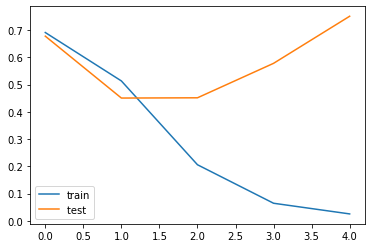

In [9]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")
plt.legend()
plt.show()

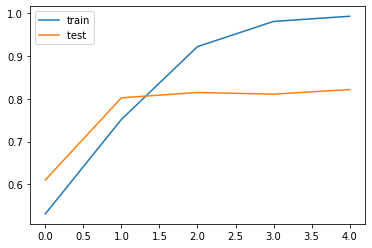

In [10]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")
plt.legend()
plt.show()

## GRU Bidirectional

In [11]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input, Bidirectional, GRU

vectorize_layer = TextVectorization(max_tokens=50000)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64))


model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, None, 64)          3200000   
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        49920     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, None, 32)          4128      
                                                                 
 dense_5 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 3,254,081
Trainable params: 3,254,081
No

Epoch 1/20
80/80 [==============================] - 20s 212ms/step - loss: 0.6914 - accuracy: 0.5172 - val_loss: 0.6812 - val_accuracy: 0.5382
Epoch 2/20
80/80 [==============================] - 16s 203ms/step - loss: 0.6594 - accuracy: 0.5787 - val_loss: 0.6715 - val_accuracy: 0.5751
Epoch 3/20
80/80 [==============================] - 19s 235ms/step - loss: 0.4771 - accuracy: 0.7719 - val_loss: 0.5588 - val_accuracy: 0.7260
Epoch 4/20
80/80 [==============================] - 17s 215ms/step - loss: 0.3423 - accuracy: 0.8838 - val_loss: 0.4796 - val_accuracy: 0.8298
Epoch 5/20
80/80 [==============================] - 17s 219ms/step - loss: 0.2330 - accuracy: 0.9313 - val_loss: 0.5335 - val_accuracy: 0.8155
Epoch 6/20
80/80 [==============================] - 16s 204ms/step - loss: 0.1655 - accuracy: 0.9554 - val_loss: 0.5548 - val_accuracy: 0.8225
Epoch 7/20
80/80 [==============================] - 16s 203ms/step - loss: 0.2104 - accuracy: 0.9399 - val_loss: 0.7048 - val_accuracy: 0.7915

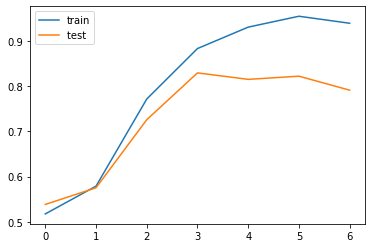

In [12]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, callbacks=[history_Adam, early_stopping])

plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()


In [13]:
model.evaluate(X_test,y_test)

1000/1000 [==============================] - 25s 25ms/step - loss: 0.6888 - accuracy: 0.7904


[0.6887593865394592, 0.7904340028762817]

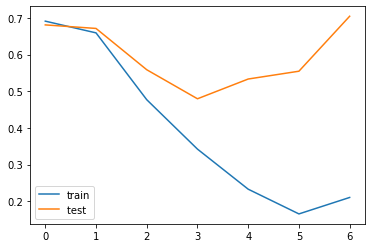

In [14]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")

plt.legend()
plt.show()

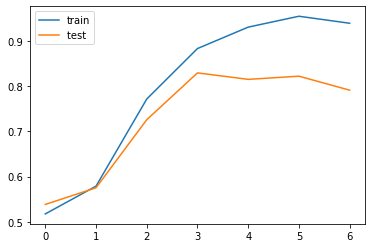

In [15]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()

## Approach 5 - TwoLayer - Bidirectional GRU - with standarization
https://www.dialog-21.ru/media/3380/arkhipenkoetal.pdf

In [18]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input, Bidirectional, GRU

vectorize_layer = TextVectorization(
    max_tokens=50000,
    standardize="lower_and_strip_punctuation"
  )
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64))


model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Bidirectional(GRU(64)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_4 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, None, 64)          3200000   
                                                                 
 bidirectional_5 (Bidirectio  (None, None, 256)        148992    
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 32)                4128      
                                                      

In [19]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, callbacks=[early_stopping, history_Adam])

Epoch 1/20
80/80 [==============================] - 79s 741ms/step - loss: 0.6548 - accuracy: 0.6035 - val_loss: 0.6027 - val_accuracy: 0.6752
Epoch 2/20
80/80 [==============================] - 43s 537ms/step - loss: 0.4191 - accuracy: 0.8156 - val_loss: 0.4968 - val_accuracy: 0.7858
Epoch 3/20
80/80 [==============================] - 61s 764ms/step - loss: 0.1733 - accuracy: 0.9373 - val_loss: 0.5620 - val_accuracy: 0.7965
Epoch 4/20
80/80 [==============================] - 56s 698ms/step - loss: 0.0696 - accuracy: 0.9794 - val_loss: 0.7072 - val_accuracy: 0.7834
Epoch 5/20
80/80 [==============================] - 55s 697ms/step - loss: 0.0312 - accuracy: 0.9914 - val_loss: 0.8644 - val_accuracy: 0.7984
Epoch 5: early stopping


In [20]:
model.evaluate(X_test,y_test)

1000/1000 [==============================] - 46s 44ms/step - loss: 0.8617 - accuracy: 0.7984


[0.8617469668388367, 0.7984374761581421]

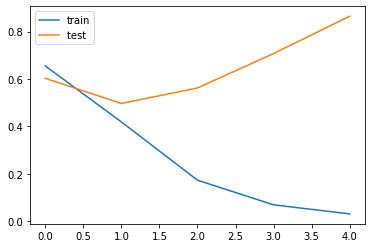

In [21]:
import matplotlib.pyplot as plt
plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")
plt.legend()
plt.show()

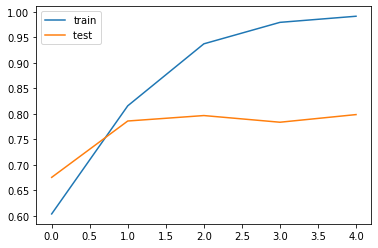

In [22]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")
plt.legend()
plt.show()

## Approach 6 - TwoLayer - GRU - with standarization and bigrams
https://www.dialog-21.ru/media/3380/arkhipenkoetal.pdf

In [23]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input, Bidirectional, GRU

vectorize_layer = TextVectorization(
    max_tokens=50000,
    standardize="lower_and_strip_punctuation",
    ngrams = 2
  )
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64))


model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Bidirectional(GRU(64)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_5 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, None, 64)          3200000   
                                                                 
 bidirectional_7 (Bidirectio  (None, None, 256)        148992    
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                      

In [24]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, callbacks=[early_stopping, history_Adam])

Epoch 1/20
80/80 [==============================] - 116s 1s/step - loss: 0.6343 - accuracy: 0.6122 - val_loss: 0.6142 - val_accuracy: 0.6714
Epoch 2/20
80/80 [==============================] - 110s 1s/step - loss: 0.4485 - accuracy: 0.8069 - val_loss: 0.4399 - val_accuracy: 0.8179
Epoch 3/20
80/80 [==============================] - 110s 1s/step - loss: 0.2819 - accuracy: 0.8972 - val_loss: 0.4194 - val_accuracy: 0.8190
Epoch 4/20
80/80 [==============================] - 110s 1s/step - loss: 0.1430 - accuracy: 0.9539 - val_loss: 0.5432 - val_accuracy: 0.7989
Epoch 5/20
80/80 [==============================] - 110s 1s/step - loss: 0.0636 - accuracy: 0.9819 - val_loss: 0.6262 - val_accuracy: 0.8164
Epoch 6/20
80/80 [==============================] - 110s 1s/step - loss: 0.0253 - accuracy: 0.9945 - val_loss: 0.7930 - val_accuracy: 0.7859
Epoch 6: early stopping


In [25]:
model.evaluate(X_test,y_test)

1000/1000 [==============================] - 84s 83ms/step - loss: 0.7916 - accuracy: 0.7861


[0.7916190028190613, 0.786062479019165]

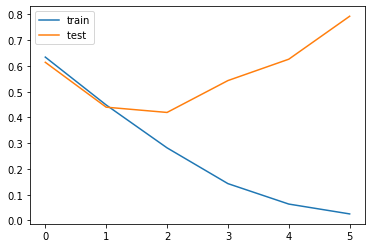

In [26]:
import matplotlib.pyplot as plt
plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")
plt.legend()
plt.show()

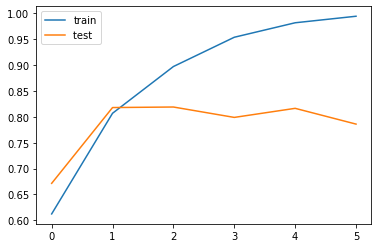

In [27]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")
plt.legend()
plt.show()